In [80]:
# Import the libraries

import numpy as np 
import pandas as pd 
import sklearn as sk 
import matplotlib as mlt
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [134]:
# Importing Stock Dataset
 
df = pd.read_csv("RELIANCE.NS.csv")
df


,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-08-20,2143.000000,2172.000000,2137.000000,2148.250000,2141.801514,4350228
1,2021-08-23,2174.000000,2174.000000,2132.300049,2162.350098,2155.859375,4547802
2,2021-08-24,2165.050049,2192.000000,2155.600098,2183.699951,2177.145264,5475452
3,2021-08-25,2185.399902,2220.000000,2180.100098,2202.600098,2195.988525,6175126
4,2021-08-26,2208.000000,2244.899902,2205.000000,2230.449951,2223.754883,8579105
...,...,...,...,...,...,...,...
243,2022-08-11,2603.100098,2609.899902,2580.199951,2591.100098,2583.322510,3783480
244,2022-08-12,2590.300049,2641.350098,2582.199951,2633.000000,2625.096436,5838244
245,2022-08-16,2646.199951,2657.300049,2627.300049,2651.300049,2643.341553,3049304
246,2022-08-17,2665.000000,2676.899902,2655.550049,2665.149902,2657.149902,3044037


In [135]:
print(df.isna().any())

Date         False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool


In [136]:
df.shape

(248, 7)

In [137]:
df = df.dropna()
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-08-20,2143.000000,2172.000000,2137.000000,2148.250000,2141.801514,4350228
1,2021-08-23,2174.000000,2174.000000,2132.300049,2162.350098,2155.859375,4547802
2,2021-08-24,2165.050049,2192.000000,2155.600098,2183.699951,2177.145264,5475452
3,2021-08-25,2185.399902,2220.000000,2180.100098,2202.600098,2195.988525,6175126
4,2021-08-26,2208.000000,2244.899902,2205.000000,2230.449951,2223.754883,8579105
...,...,...,...,...,...,...,...
243,2022-08-11,2603.100098,2609.899902,2580.199951,2591.100098,2583.322510,3783480
244,2022-08-12,2590.300049,2641.350098,2582.199951,2633.000000,2625.096436,5838244
245,2022-08-16,2646.199951,2657.300049,2627.300049,2651.300049,2643.341553,3049304
246,2022-08-17,2665.000000,2676.899902,2655.550049,2665.149902,2657.149902,3044037


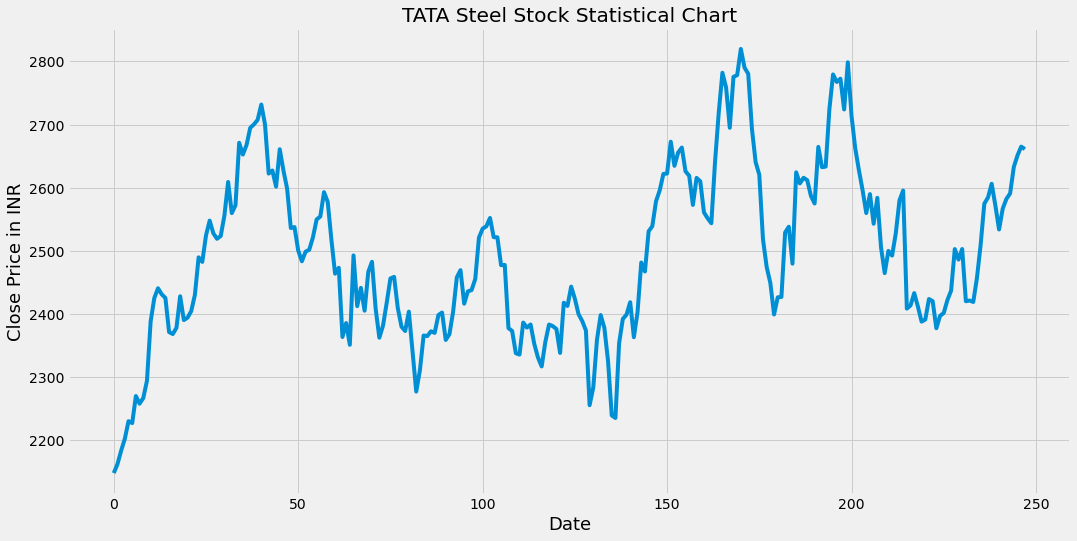

In [139]:
# Data Visualize the closing price history

plt.figure(figsize=(16,8))
plt.title('TATA Steel Stock Statistical Chart')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price in INR',fontsize=18)
plt.style.use("fivethirtyeight")
plt.show()
 

In [188]:
training_set = df[["Date","Close"]]
training_set = pd.DataFrame(training_set)
training_set.tail()

,Date,Close
243,2022-08-11,2591.100098
244,2022-08-12,2633.000000
245,2022-08-16,2651.300049
246,2022-08-17,2665.149902
247,2022-08-18,2661.300049


In [190]:
# Create a variable to predict 'x' days out into the future
future_days = 25

# Create a new coloumn (target) 'x' units/days up
training_set['Prediction'] = df[['Close']].shift(-future_days) 
print(training_set.head())
print(training_set.tail())

         Date        Close   Prediction
0  2021-08-20  2148.250000  2524.449951
1  2021-08-23  2162.350098  2548.050049
2  2021-08-24  2183.699951  2527.850098
3  2021-08-25  2202.600098  2519.250000
4  2021-08-26  2230.449951  2523.699951
           Date        Close  Prediction
243  2022-08-11  2591.100098         NaN
244  2022-08-12  2633.000000         NaN
245  2022-08-16  2651.300049         NaN
246  2022-08-17  2665.149902         NaN
247  2022-08-18  2661.300049         NaN


In [196]:

# Create the feature data set (x) and convert it to a NumPy array and remove the last 'x' rows/days

X = np.array(training_set.drop(['Prediction'],1))[:-future_days]
X

C:\Users\NeonPsy\AppData\Local\Temp\ipykernel_20472\1404040585.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(training_set.drop(['Prediction'],1))[:-future_days]


array([['2021-08-20', 2148.25],
       ['2021-08-23', 2162.350098],
       ['2021-08-24', 2183.699951],
       ['2021-08-25', 2202.600098],
       ['2021-08-26', 2230.449951],
       ['2021-08-27', 2227.399902],
       ['2021-08-30', 2270.25],
       ['2021-08-31', 2258.149902],
       ['2021-09-01', 2267.100098],
       ['2021-09-02', 2294.399902],
       ['2021-09-03', 2388.5],
       ['2021-09-06', 2425.600098],
       ['2021-09-07', 2440.899902],
       ['2021-09-08', 2431.350098],
       ['2021-09-09', 2425.600098],
       ['2021-09-13', 2371.550049],
       ['2021-09-14', 2368.449951],
       ['2021-09-15', 2378.300049],
       ['2021-09-16', 2428.199951],
       ['2021-09-17', 2390.550049],
       ['2021-09-20', 2394.350098],
       ['2021-09-21', 2404.699951],
       ['2021-09-22', 2430.5],
       ['2021-09-23', 2489.899902],
       ['2021-09-24', 2482.699951],
       ['2021-09-27', 2524.449951],
       ['2021-09-28', 2548.050049],
       ['2021-09-29', 2527.850098],
       ['2

In [195]:
# Create the Target Dataset (Y) and convert it to Numpy Array and get all of the target value s except the ast X rows

y = np.array(training_set['Prediction'])[:-future_days]
y


array([2524.449951, 2548.050049, 2527.850098, 2519.25    , 2523.699951,
       2556.149902, 2609.199951, 2559.850098, 2572.399902, 2671.25    ,
       2652.649902, 2667.800049, 2694.949951, 2700.399902, 2707.600098,
       2731.850098, 2700.399902, 2622.5     , 2627.399902, 2601.800049,
       2661.050049, 2627.399902, 2598.600098, 2536.25    , 2537.800049,
       2500.800049, 2483.600098, 2498.850098, 2501.949951, 2521.699951,
       2549.899902, 2554.550049, 2593.100098, 2577.800049, 2517.899902,
       2464.      , 2473.300049, 2363.75    , 2385.850098, 2351.399902,
       2492.949951, 2412.600098, 2441.5     , 2405.399902, 2467.      ,
       2482.850098, 2408.25    , 2362.600098, 2381.850098, 2418.100098,
       2456.449951, 2458.949951, 2409.649902, 2380.149902, 2373.199951,
       2403.899902, 2340.449951, 2277.350098, 2311.25    , 2366.100098,
       2365.25    , 2372.800049, 2370.25    , 2398.399902, 2402.5     ,
       2359.100098, 2368.149902, 2403.850098, 2458.100098, 2469.

In [187]:
# Split the data into 80% training and 20% testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)


In [179]:
# Create the models

# Create the Decision Tree Model
tree = DecisionTreeRegressor().fit(X_train, y_train)

# Create the Linear Regression model
lr = LinearRegression().fit(X_train, y_train)

In [180]:
X_future = training_set.drop(['Prediction'],1)[:-future_days]
X_future = X_future.tail(future_days)
X_future = np.array(X_future)
X_future

C:\Users\NeonPsy\AppData\Local\Temp\ipykernel_20472\3536634543.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_future = training_set.drop(['Prediction'],1)[:-future_days]


array([[2724.050049],
       [2798.75    ],
       [2714.25    ],
       [2662.899902],
       [2628.100098],
       [2596.300049],
       [2560.      ],
       [2590.      ],
       [2543.050049],
       [2584.100098],
       [2505.600098],
       [2464.949951],
       [2500.050049],
       [2492.649902],
       [2527.699951],
       [2580.149902],
       [2595.649902],
       [2408.699951],
       [2413.699951],
       [2433.25    ],
       [2411.850098],
       [2388.100098],
       [2391.399902],
       [2423.899902],
       [2420.449951]])

In [181]:
#Show the tree Model Prediction 
tree_prediction = tree.predict(X_future)
tree_prediction

array([2587.100098, 2767.550049, 2587.100098, 2422.25    , 2437.100098,
       2503.      , 2486.300049, 2503.100098, 2420.399902, 2421.5     ,
       2419.199951, 2457.100098, 2456.449951, 2574.850098, 2584.649902,
       2606.350098, 2571.899902, 2534.      , 2567.149902, 2582.5     ,
       2595.850098, 2633.      , 2651.300049, 2665.149902, 2661.300049])

In [182]:
# Show the linear Model Prediction
lr_prediction = lr.predict(X_future)
lr_prediction


array([2504.65078192, 2501.7731939 , 2505.02829895, 2507.00640503,
       2508.34696146, 2509.57196146, 2510.97031025, 2509.81465165,
       2511.62325547, 2510.0419274 , 2513.06590073, 2514.6318238 ,
       2513.27969946, 2513.56476758, 2512.21457123, 2510.19409667,
       2509.59700639, 2516.79868367, 2516.6060739 , 2515.85296783,
       2516.67733385, 2517.59223025, 2517.46511535, 2516.21315187,
       2516.34605072])

C:\Users\NeonPsy\AppData\Local\Temp\ipykernel_20472\4156146366.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


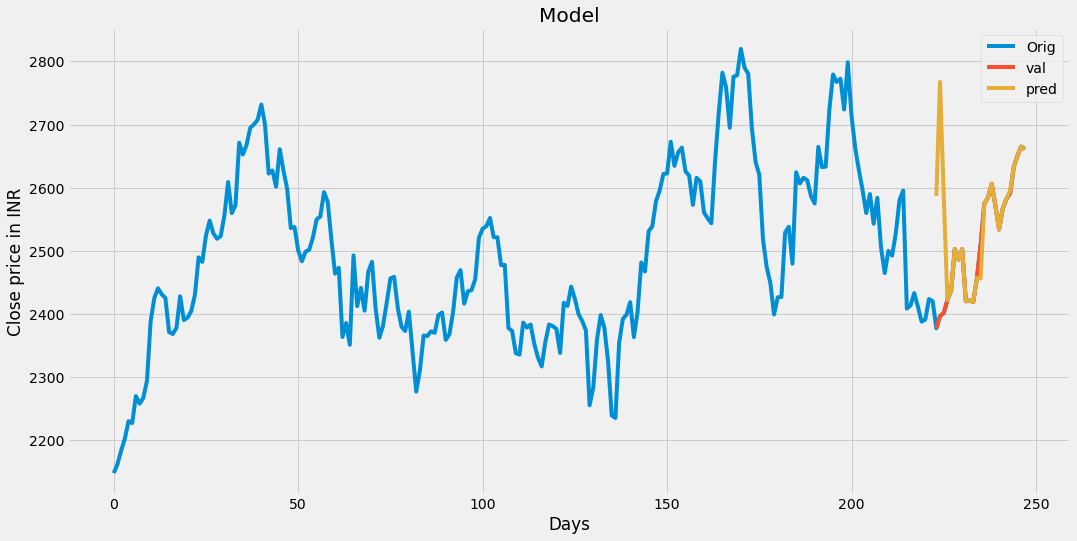

In [183]:
# Visualize the Data 

predictions = tree_prediction
valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close price in INR')
plt.plot(df['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Orig','val','pred'])
plt.show()

C:\Users\NeonPsy\AppData\Local\Temp\ipykernel_20472\688767563.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


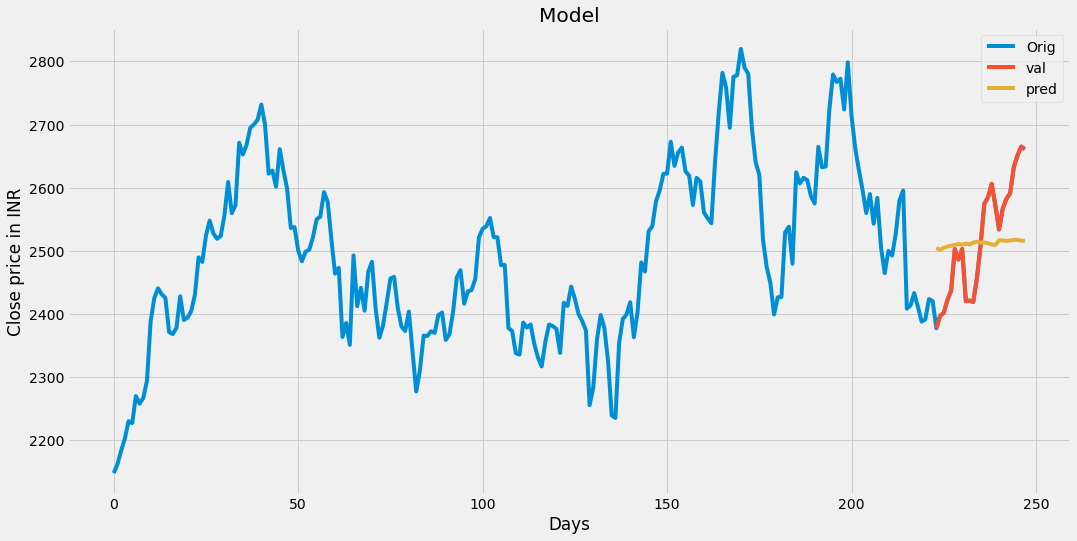

In [185]:
# Visualize the Data 

predictions = lr_prediction
valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close price in INR')
plt.plot(df['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Orig','val','pred'])
plt.show()

In [177]:
# Checking accuracy score

from sklearn.metrics import accuracy_score
lr = accuracy_score(lr_prediction, y_test)

ValueError: Found input variables with inconsistent numbers of samples: [25, 56]